In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Medical_insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.shape

(2772, 7)

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.sample(6)

,age,sex,bmi,children,smoker,region,charges
558,35,female,34.105,3,yes,northwest,39983.42595
348,36,female,29.920,1,no,southeast,5478.03680
1526,34,male,22.420,2,no,northeast,27375.90478
196,39,female,32.800,0,no,southwest,5649.71500
399,18,female,38.170,0,no,southeast,1631.66830
277,22,female,24.300,0,no,southwest,2150.46900


## Data Visulization

In [15]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

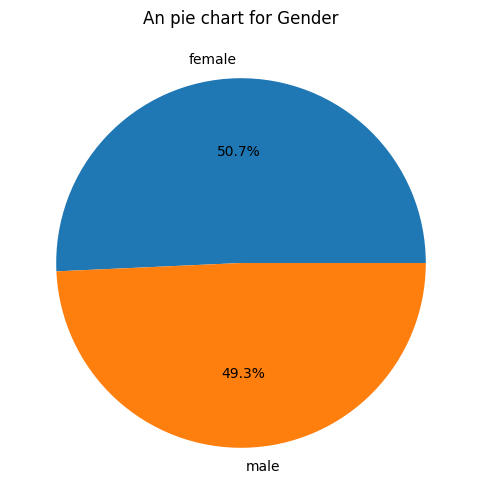

In [17]:
plt.figure(figsize=(6,6))
plt.pie(df['sex'].value_counts(),labels=['female', 'male'],autopct='%1.1f%%')
plt.title("An pie chart for Gender")
plt.show()

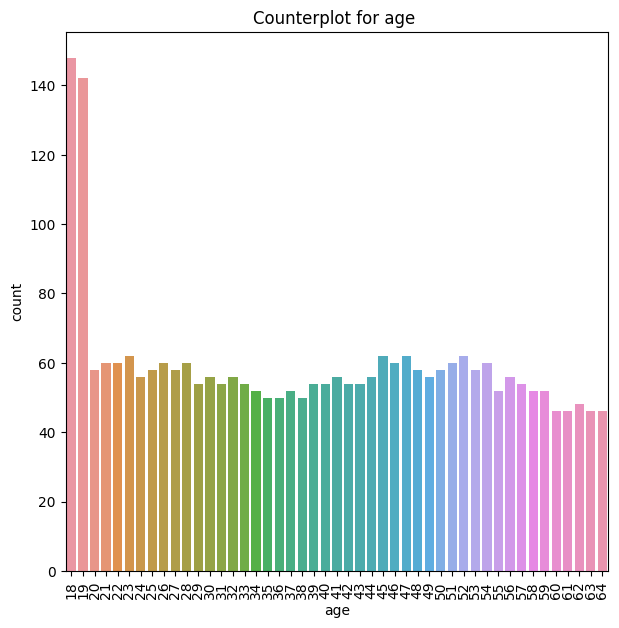

In [21]:
plt.figure(figsize=(7,7))
sns.countplot(x='age',data=df)
plt.xticks(rotation=90)
plt.title("Counterplot for age ")
plt.show()

In [22]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

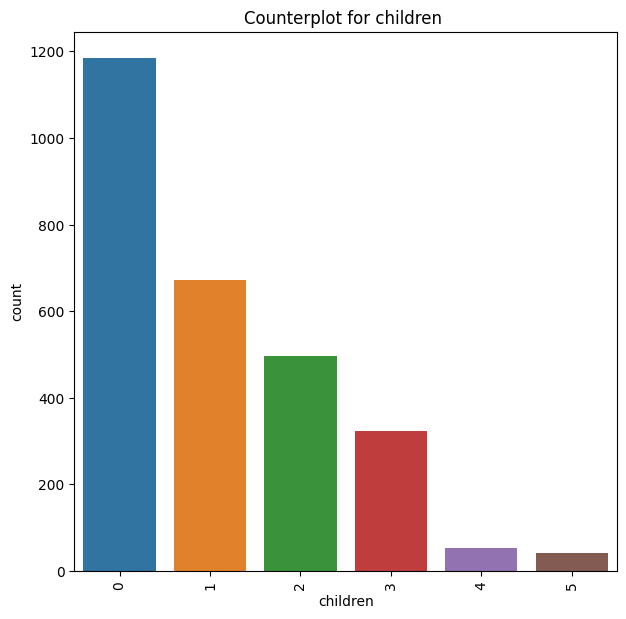

In [23]:
plt.figure(figsize=(7,7))
sns.countplot(x='children',data=df)
plt.xticks(rotation=90)
plt.title("Counterplot for children ")
plt.show()

In [24]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

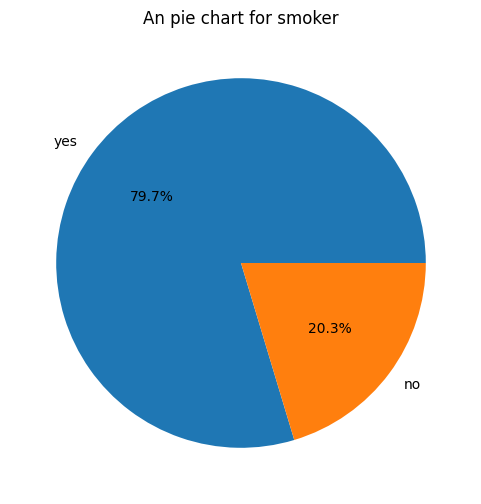

In [25]:
plt.figure(figsize=(6,6))
plt.pie(df['smoker'].value_counts(),labels=['yes', 'no'],autopct='%1.1f%%')
plt.title("An pie chart for smoker")
plt.show()

In [26]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

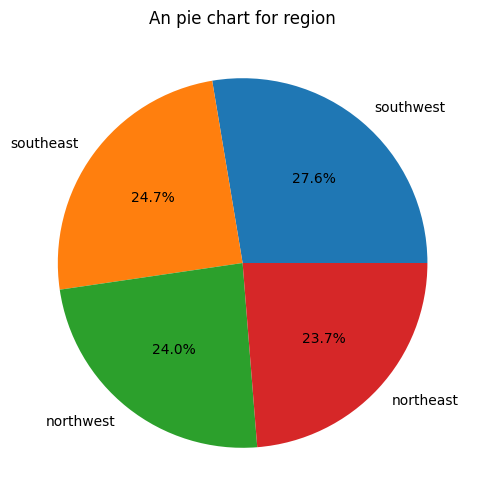

In [27]:
plt.figure(figsize=(6,6))
plt.pie(df['region'].value_counts(),labels=['southwest', 'southeast', 'northwest', 'northeast'],autopct='%1.1f%%')
plt.title("An pie chart for region")
plt.show()

## LabelEncoder

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
a=['sex','smoker','region']

In [31]:
for i in a:
    le.fit_transform(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i])

sex 0       0
1       1
2       1
3       1
4       1
       ..
2767    0
2768    0
2769    1
2770    1
2771    1
Name: sex, Length: 2772, dtype: int32
smoker 0       1
1       0
2       0
3       0
4       0
       ..
2767    0
2768    0
2769    1
2770    0
2771    0
Name: smoker, Length: 2772, dtype: int32
region 0       3
1       2
2       2
3       1
4       1
       ..
2767    2
2768    3
2769    1
2770    1
2771    3
Name: region, Length: 2772, dtype: int32


In [32]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,0.000932,0.298624
sex,-0.026046,1.000000,0.042924,0.016020,0.082326,0.004808,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.159178,0.199846
children,0.037574,0.016020,-0.001492,1.000000,0.006362,0.016111,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,-0.006751,0.788783
region,0.000932,0.004808,0.159178,0.016111,-0.006751,1.000000,-0.013530
charges,0.298624,0.062837,0.199846,0.066442,0.788783,-0.013530,1.000000


**HeatMap**

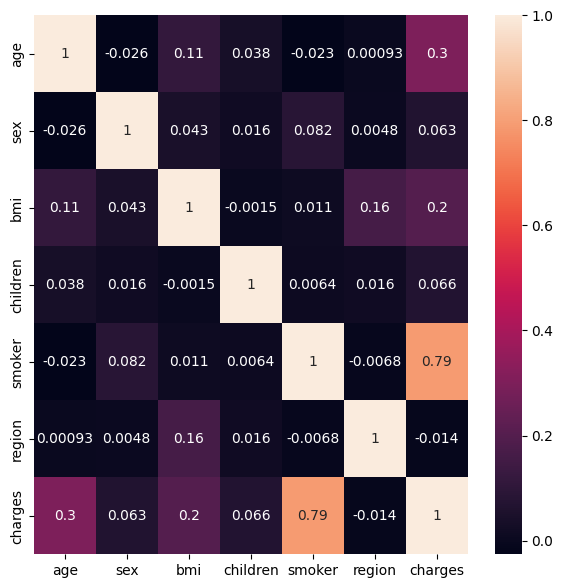

In [34]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x=df.drop(['charges'],axis=1)

In [37]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2
2768,21,0,34.600,0,0,3
2769,19,1,26.030,1,1,1
2770,23,1,18.715,0,0,1


In [38]:
y=df['charges']

In [40]:
y.to_frame()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
2767,8569.86180
2768,2020.17700
2769,16450.89470
2770,21595.38229


In [41]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
x_train

,age,sex,bmi,children,smoker,region
1864,21,1,36.850,0,0,2
1997,38,0,34.800,2,0,3
1336,21,0,25.800,0,0,3
655,52,0,25.300,2,1,2
261,20,0,26.840,1,1,2
...,...,...,...,...,...,...
1638,54,1,34.210,2,1,2
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0


In [43]:
x_test

,age,sex,bmi,children,smoker,region
1106,49,0,29.925,0,0,1
1321,62,1,26.695,0,1,0
2313,57,0,20.100,1,0,3
2274,22,1,39.500,0,0,3
1432,18,0,38.665,2,0,0
...,...,...,...,...,...,...
930,26,1,46.530,1,0,2
2610,41,1,23.940,1,0,0
1700,27,0,31.400,0,1,3
100,41,0,31.600,0,0,3


In [44]:
y_train

1864     1534.30450
1997     6571.54400
1336     2007.94500
655     24667.41900
261     17085.26760
           ...     
1638    44260.74990
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
Name: charges, Length: 2217, dtype: float64

In [45]:
y_test

1106     8988.15875
1321    28101.33305
2313    12032.32600
2274     1682.59700
1432     3393.35635
           ...     
930      2927.06470
2610     6858.47960
1700    34838.87300
100      6186.12700
315      9722.76950
Name: charges, Length: 555, dtype: float64

## MinMaxScaler

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
ms=MinMaxScaler()

In [48]:
x_train[x_train.columns]=ms.fit_transform(x_train[x_train.columns])
x_test[x_test.columns]=ms.transform(x_test[x_test.columns])

In [49]:
x_train

,age,sex,bmi,children,smoker,region
1864,0.065217,1.0,0.570453,0.0,0.0,0.666667
1997,0.434783,0.0,0.514473,0.4,0.0,1.000000
1336,0.065217,0.0,0.268706,0.0,0.0,1.000000
655,0.739130,0.0,0.255052,0.4,1.0,0.666667
261,0.043478,0.0,0.297105,0.2,1.0,0.666667
...,...,...,...,...,...,...
1638,0.782609,1.0,0.498362,0.4,1.0,0.666667
1095,0.000000,0.0,0.420262,0.8,0.0,0.000000
1130,0.456522,0.0,0.216002,1.0,0.0,0.666667
1294,0.869565,1.0,0.251638,0.0,0.0,0.000000


In [50]:
x_test

,age,sex,bmi,children,smoker,region
1106,0.673913,0.0,0.381349,0.0,0.0,0.333333
1321,0.956522,1.0,0.293146,0.0,1.0,0.000000
2313,0.847826,0.0,0.113053,0.2,0.0,1.000000
2274,0.086957,1.0,0.642818,0.0,0.0,1.000000
1432,0.000000,0.0,0.620016,0.4,0.0,0.000000
...,...,...,...,...,...,...
930,0.173913,1.0,0.834790,0.2,0.0,0.666667
2610,0.500000,1.0,0.217914,0.2,0.0,0.000000
1700,0.195652,0.0,0.421628,0.0,1.0,1.000000
100,0.500000,0.0,0.427089,0.0,0.0,1.000000


## Model Selection

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr=LinearRegression()

In [54]:
lr.fit(x_train,y_train)

LinearRegression()

In [55]:
lr.score(x_test,y_test)

0.7398864322395977

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
dtr=DecisionTreeRegressor()

In [64]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
dtr.score(x_test,y_test)

0.9367765185117022

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rf=RandomForestRegressor()

In [68]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [69]:
rf.score(x_test,y_test)

0.9492966891451927

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
grb=GradientBoostingRegressor()

In [85]:
grb.fit(x_train,y_train)

GradientBoostingRegressor()

In [86]:
grb.score(x_test,y_test)

0.8772268996916247

In [87]:
from xgboost import XGBRegressor

In [88]:
xg=XGBRegressor()

In [89]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [90]:
xg.score(x_test,y_test)

0.9548264139084454

## Model Comparision

In [92]:
model=['Linear regression','Decision Tree','Random forest','Gradiant boost','XGboost']
acc=[0.7398864322395977,0.9367765185117022,0.9492966891451927,0.8772268996916247,0.9548264139084454]

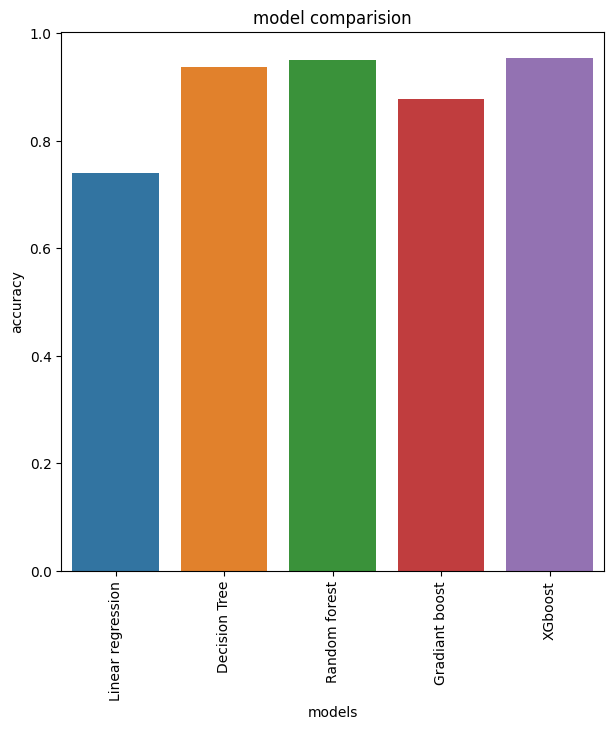

In [93]:
plt.figure(figsize=(7,7))
sns.barplot(x=model,y=acc)
plt.xticks(rotation=90)
plt.title("model comparision")
plt.xlabel("models")
plt.ylabel("accuracy")
plt.show()